# 蒙特卡洛模拟法计算阴影面积

画一个正方形边长为$2r$，作其内切圆，并以其边长为半径，相对的两顶点为圆心，分别作两个四分之一圆。求阴影面积。  
解：
以正方形左下角为原点，上方为$y$轴正方向，建立平面直角坐标系。  
则该圆的解析式为$(x-r)^2+(y-r)^2=r^2$  
在上方的四分之一圆的解析式为$(x-2r)^2+y^2=4r^2$  
在下方的四分之一圆的解析式为$x^2+(y-2r)^2=4r^2$

In [1]:
import matplotlib.pyplot as plt # 画图工具
import numpy as np
%matplotlib inline

In [2]:
# 重要常量
r = 5
# 每条曲线描点数
samples = 1000
# 随机点数
rand_samples = 100000
# 因为生成的是随机整数，所以这里需要将r放大，保证有足够的点精细度
# Experiments show that 15 is a good value here
scale = 15 * rand_samples
r *= scale

In [3]:
%%capture
# 初始化的代码
fig, ax = plt.subplots(figsize=(7, 7))

# 制作教科书样式的坐标系
#ax.axis[:].set_visible(False)
#ax.axis["x"] = ax.new_floating_axis(0,0)
#ax.axis["x"].set_axisline_style("->", size = 1.0)
#ax.axis["x"].set_axis_direction("top")
#ax.axis["y"] = ax.new_floating_axis(1,0)
#ax.axis["y"].set_axisline_style("->", size = 1.0)
#ax.axis["y"].set_axis_direction("right")

ax.set_xlim(0, 2*r + 1)
ax.set_ylim(0, 2*r + 1)

# x轴数组
x = np.linspace(0, 2*r, samples)

圆的函数：
$$
(x-r)^2+(y1-r)^2=r^2\\
(y_1-r)^2=r^2 - (x-r)^2\\
y_1-r=\pm\sqrt{r^2 - (x-r)^2}\\
{y_1}_1=r+\sqrt{r^2 - (x-r)^2}, {y_1}_2=r-\sqrt{r^2 - (x-r)^2}
$$

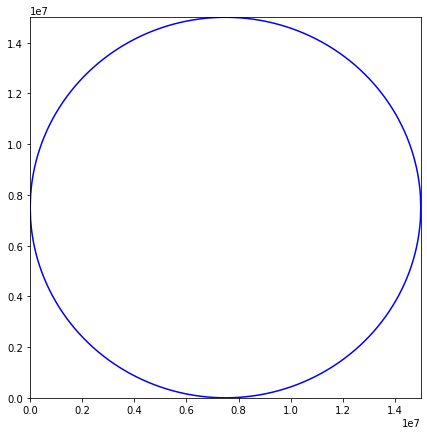

In [4]:
y1_upper = lambda x: r + np.sqrt(r**2 - (x - r)**2)
y1_lower = lambda x: r - np.sqrt(r**2 - (x - r)**2)
ax.plot(x,y1_upper(x), c='b')
ax.plot(x,y1_lower(x), c='b')
fig

上四分之一圆的函数：
$$
(x-2r)^2+y_2^2=4r^2\\
y_2^2=4r^2-(x-2r)^2\\
y_2=\pm\sqrt{4r^2-(x-2r)^2}\\
\because 取上半部分\\
\therefore y_2 = \sqrt{4r^2-(x-2r)^2},(0\leqslant y_2\leqslant r)
$$

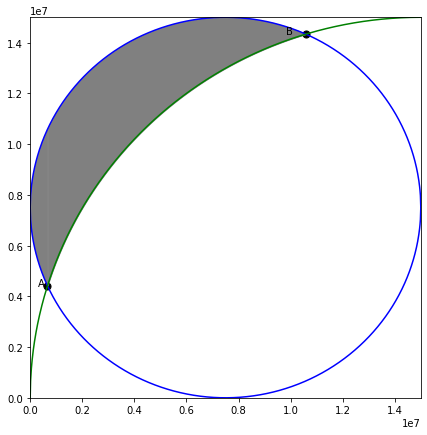

In [5]:
y2 = lambda x: np.sqrt(4 * r**2 - (x - 2*r)**2)
ax.plot(x,y2(x), c='g')
# 标出两个交点
ax.scatter((3 - np.sqrt(7))/4*r, np.sqrt(2 - 5/8*np.sqrt(7))*r, s = 50, c='k')
ax.text(((3 - np.sqrt(7))/4 - 0.05)*r, np.sqrt(2-5/8*np.sqrt(7))*r, "A")
ax.scatter((3 + np.sqrt(7))/4*r, np.sqrt(2 + 5/8*np.sqrt(7))*r, s = 50, c='k')
ax.text(((3 + np.sqrt(7))/4 - 0.1)*r, np.sqrt(2+5/8*np.sqrt(7))*r, "B")
# 画出阴影
ax.fill_between(x, y1_upper(x), y1_lower(x),
                where=y1_lower(x) >= y2(x),
                color="grey")
ax.fill_between(x, y1_upper(x), y2(x),
                where=(y1_lower(x) <= y2(x)) & (y1_upper(x) > y2(x)),
                color="grey")
fig

下四分之一圆的函数：
$$
x^2+(y_3-2r)^2=4r^2\\
(y_3-2r)^2=4r^2-x^2\\
y_3-2r=\pm\sqrt{4r^2-x^2}\\
\because 取下半部分\\
\therefore y_3-2r = -\sqrt{4r^2-x^2},(0\leqslant y_3\leqslant r)\\
y_3=2r-\sqrt{4r^2-x^2}
$$

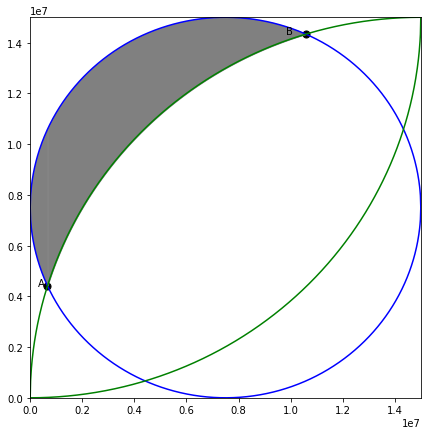

In [6]:
y3 = lambda x: 2*r - np.sqrt(4 * r**2 - x**2)
ax.plot(x,y3(x), c='g')
fig

下面，我们去获得一些随机数，并描出随机点。

In [7]:
#rand_x = [SystemRandom().randint(0, 2*r) for i in range(rand_samples)]
#rand_y = [SystemRandom().randint(0, 2*r) for i in range(rand_samples)]
rand_x = np.random.randint(0, 2*r + 1, rand_samples)
rand_y = np.random.randint(0, 2*r + 1, rand_samples)

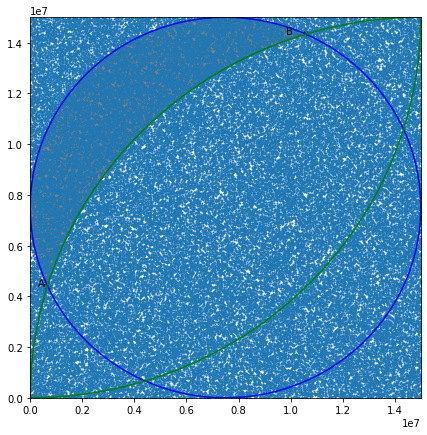

In [8]:
ax.scatter(rand_x, rand_y, s=1)
fig

然后我们需要数出在阴影内的点的个数，思路如下：  
如果$0\leqslant x_点 < x_A$，那么判断${y_1}_2\leqslant y_点 < {y_1}_1$  
如果$x_A\leqslant x_点 < x_B$，那么判断$y_2\leqslant y_点 < {y_1}_1$  
其余情况，点在阴影外。

我们首先要求出点$A,B$的横坐标。  
点$A$：  
$$
\begin{cases}
y=r-\sqrt{r^2-(x-r)^2}\\
y=\sqrt{4r^2-(x-2r)^2}
\end{cases}\\
且0\leqslant x \leqslant r\\
联立二式：\\
r-\sqrt{r^2-(x-r)^2}=\sqrt{4r^2-(x-2r)^2}\\
化简得：\\
8x^2-12xr+r^2=0\\
\begin{aligned}
\Delta&=b^2-4ac\\
&=144r^2-32r^2\\
&=112r^2\\
x&=\frac{3r\pm r\sqrt{7}}{4}\\
x&=\frac{3\pm\sqrt{7}}{4}r
\end{aligned}\\
\because 0\leqslant x \leqslant r\\
\therefore 取x=\frac{3-\sqrt{7}}{4}r
$$
点$B$：
$$
\begin{cases}
y=r+\sqrt{r^2-(x-r)^2}\\
y=\sqrt{4r^2-(x-2r)^2}
\end{cases}\\
且r\leqslant x \leqslant 2r\\
联立二式：\\
r+\sqrt{r^2-(x-r)^2}=\sqrt{4r^2-(x-2r)^2}\\
解得：
x=\frac{3\pm\sqrt{7}}{4}r\\
\because r\leqslant x \leqslant 2r\\
\therefore 取x=\frac{3+\sqrt{7}}{4}r
$$

In [9]:
inside = 0
for idx in range(rand_samples):
    x_dot = rand_x[idx]
    y_dot = rand_y[idx]
    if 0 <= x_dot < (3-np.sqrt(7))/4*r:
        if y1_lower(x_dot) <= y_dot < y1_upper(x_dot):
            inside += 1
    if (3-np.sqrt(7))/4*r <= x_dot < (3+np.sqrt(7))/4*r:
        if y2(x_dot) <= y_dot < y1_upper(x_dot):
            inside += 1
# S = in/all * (2r)^2
size = inside/rand_samples*4*(r/scale)**2
realsize = (np.pi-np.arccos(-np.sqrt(2)/4)-4*np.arccos(5*np.sqrt(2)/8)+2*np.sin(2*np.arccos(5*np.sqrt(2)/8))-0.5*np.sin(2*np.pi-2*np.arccos(-np.sqrt(2)/4)))*(r/scale)**2
error = abs(size-realsize)
errperc = error/realsize*100
print(f"{rand_samples}个点中，有{inside}个点在阴影内，算得面积为{size}")
print(f"面积的精确值为{realsize}，误差为{error}，误差占{errperc}%")

100000个点中，有14649个点在阴影内，算得面积为14.649000000000001
面积的精确值为14.638125953034784，误差为0.010874046965216877，误差占0.07428578630970492%


还有另外一个思路：
如果点在阴影范围内，则点在小圆内，在大圆外。  
点在小圆内：
$$
d_1 < r \\
由勾股定理得：\\
d_1^2 = (r - x_{dot})^2 + (r - y_{dot})^2\\
d_1 = hypot(r - x_{dot}, r - y_{dot})\\
hypot(r - x_{dot}, r - y_{dot}) < r
$$
点在大圆外（或大圆上）：
$$
d_2 \geqslant 2r \\
由勾股定理得：\\
d_2^2 = (2r - x_{dot})^2 + y_{dot}^2\\
d_2 = hypot(2r - x_{dot}, y_{dot})\\
hypot(2r - x_{dor}, y_{dot}) \geqslant 2r
$$

In [10]:
inside = 0
for idx in range(rand_samples):
    x_dot = rand_x[idx]
    y_dot = rand_y[idx]
    d1 = np.hypot(r - x_dot, r - y_dot)
    d2 = np.hypot(2*r - x_dot, y_dot)
    if d1 < r and d2 >= 2*r:
        inside += 1
        # S = in/all * (2r)^2
size = inside/rand_samples*4*(r/scale)**2
realsize = (np.pi-np.arccos(-np.sqrt(2)/4)-4*np.arccos(5*np.sqrt(2)/8)+2*np.sin(2*np.arccos(5*np.sqrt(2)/8))-0.5*np.sin(2*np.pi-2*np.arccos(-np.sqrt(2)/4)))*(r/scale)**2
error = abs(size-realsize)
errperc = error/realsize*100
print(f"{rand_samples}个点中，有{inside}个点在阴影内，算得面积为{size}")
print(f"面积的精确值为{realsize}，误差为{error}，误差占{errperc}%")

100000个点中，有14649个点在阴影内，算得面积为14.649000000000001
面积的精确值为14.638125953034784，误差为0.010874046965216877，误差占0.07428578630970492%
